In [1]:
%load_ext autoreload
%autoreload 2
%load_ext tensorboard

In [2]:
import torch

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
random_seed = 42

from models import LM_Transformer_Custom, LMLoss
from data import LM_Dataset
from trainer_ml import LMTrainer
from utils import loaders_from_dataset, visualize_embeddings, save_model

In [3]:
dataset = LM_Dataset('datasets/wmt14_en_ger/train_small.en')
loaders = loaders_from_dataset(dataset, batch_size=32, val_perc_size=0.05)

In [4]:
%tensorboard --logdir=data

In [5]:
epochs = 20
model = LM_Transformer_Custom(vocab_size=len(dataset.Ind2word), emb_dim=128)
optim = torch.optim.AdamW(model.parameters(), lr=0.01, weight_decay=0.001)
params_trainer = {
    'model': model,
    'loaders': loaders,
    'criterion': LMLoss(),
    'optim': optim,
    'val_step': 5,
    'scheduler': torch.optim.lr_scheduler.CosineAnnealingLR(optim, epochs),
    'verbose': False,
    'device': device,
#     'params_clearml': params_clearml,
    'is_tensorboard': True
}

trainer = LMTrainer(**params_trainer)

In [6]:
trainer.loop(0, epochs, exp_name='Attention_Block_wmt14_causal_masking_MHA')

  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
word2Ind = {word: i for i, word in dataset.Ind2word.items()}

chosen_words = [
    "świetny", "głupi", "wspaniały", "spoko", "ekstra",
    "słodki", "nudny",   "zły", 
    "artyleria", "generał", 'porucznik', "sierżant", "wojsko",
#     "dobrze"
] 
chosen_idxs = [word2Ind[word] for word in chosen_words]

visualize_embeddings(model.embs.weight.detach().cpu().numpy(), chosen_idxs, dataset.Ind2word)

SVD done!


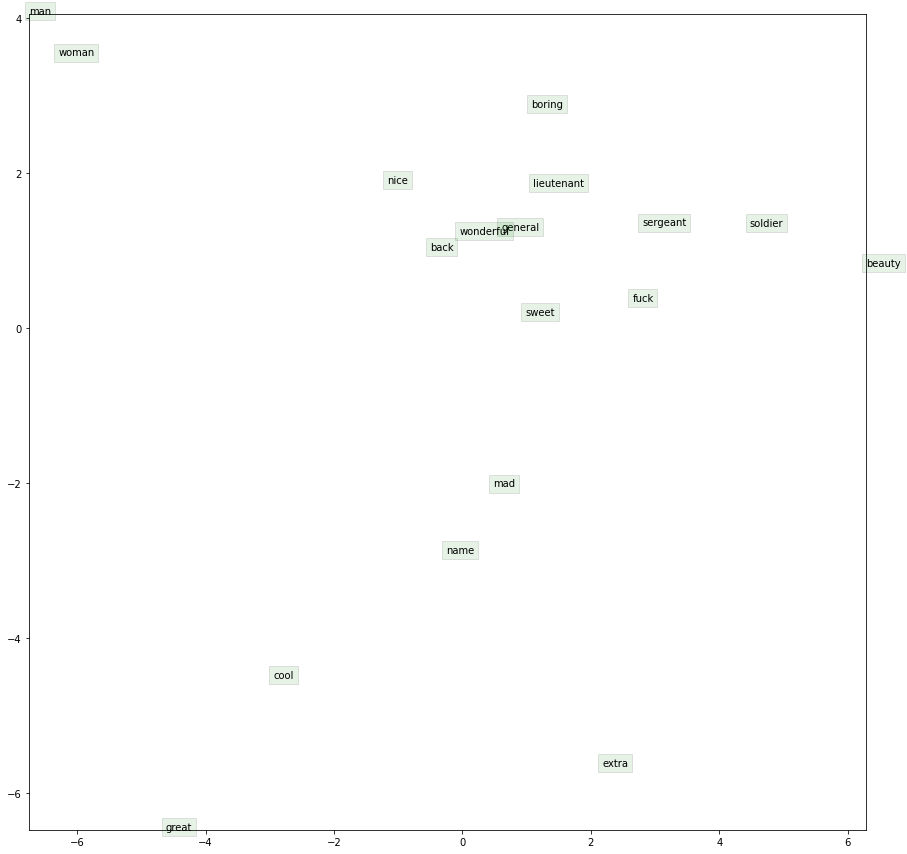

In [7]:
word2Ind = {word: i for i, word in dataset.Ind2word.items()}

chosen_words = [
    'man', 'woman', 'soldier', 'beauty', 'nice', 'name', 'fuck', 'back', 'cool', 'great', 'boring', 'mad', 'general', 'sweet', 'sergeant', 'lieutenant', 'wonderful', 'extra'
#     "dobrze"
] 
chosen_idxs = [word2Ind[word] for word in chosen_words]

visualize_embeddings(model.embs.weight.detach().cpu().numpy(), chosen_idxs, dataset.Ind2word)

## Length of sentence distribution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sent_len = np.array([len(sent) for sent in dataset.indexed_data])

In [ ]:
plt.hist(sent_len, bins=100);

In [ ]:
print(sent_len.mean(), sent_len.std(), sent_len.min(), sent_len.max())

Uwagi:
- Czy nie powinienem brac P(x_t|x_1, x_2,...,x_{t-1}) dopiero od pewnego t > 2? (t > 5)?
- Zbudować ewaluacje, 
- Poprawić trainera na guthubie (os.makedirs, .pth)

In [ ]:
from utils import load_model

In [ ]:
model = LM(vocab_size=len(dataset.Ind2word), emb_dim=50, rnn=torch.nn.LSTM)
load_model(model, 'data/LSTM/2022-04-01_00-20-06/checkpoints/_epoch_199.pth')

## Positional Embeddings

In [8]:
import matplotlib.pyplot as plt

### Sinusoidal Representation

In [9]:
T = 100
d = 512 // 2
pre_sinusoidal = torch.repeat_interleave(torch.arange(T).unsqueeze(0).float(), repeats=d, dim=0)

In [10]:
for i in range(d):
    wyk = (2 * (i + 1) / d)
    pre_sinusoidal[i] = pre_sinusoidal[i] / 1000 ** wyk

In [11]:
idxs = torch.arange(2*d)
pos_emb = torch.zeros((2*d, T))
pos_emb[idxs % 2 == 0] = torch.sin(pre_sinusoidal)
pos_emb[idxs % 2 == 1] = torch.cos(pre_sinusoidal)

Text(0, 0.5, 'Position')

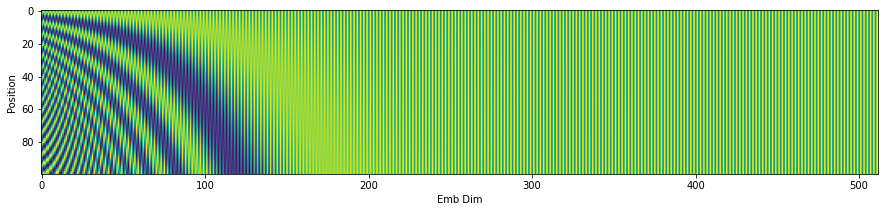

In [12]:
plt.figure(figsize=(15,20))
plt.imshow(pos_emb.T)
plt.xlabel('Emb Dim')
plt.ylabel('Position')

### Learned Representation

Text(0, 0.5, 'Position')

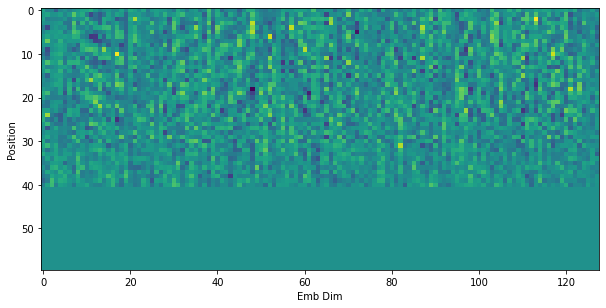

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(trainer.model.pos_emb.detach().cpu().squeeze(1))
plt.xlabel('Emb Dim')
plt.ylabel('Position')